# 05 - PRESELECCIÓN DE VARIABLES

Es este notebook vamos a realizar diferentes métodos para detectar las mejores variables predictivas y ayudar al modelo a reducir la dimensiones y mejorar las métricas predictivas.

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Métodos supervisados
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

## IMPORTAR LOS DATOS

In [2]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0


### SEPARAR PREDICTORAS Y TARGET

In [3]:
x = df.drop(columns= 'produccion').copy()
y = df.produccion.copy()

In [4]:
#Revisamos predicoras
x.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50
5,-0.33,0.67,1,0,1,0,0.8,0,0.50


In [5]:
#revisamos las target
y.head()

0    0
1    1
2    0
4    1
5    0
Name: produccion, dtype: int64

## MÉTODOS SUPERVISADOS

### Mutual Information

#### Crear una función para mostrar el resultado

In [6]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (16,5))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

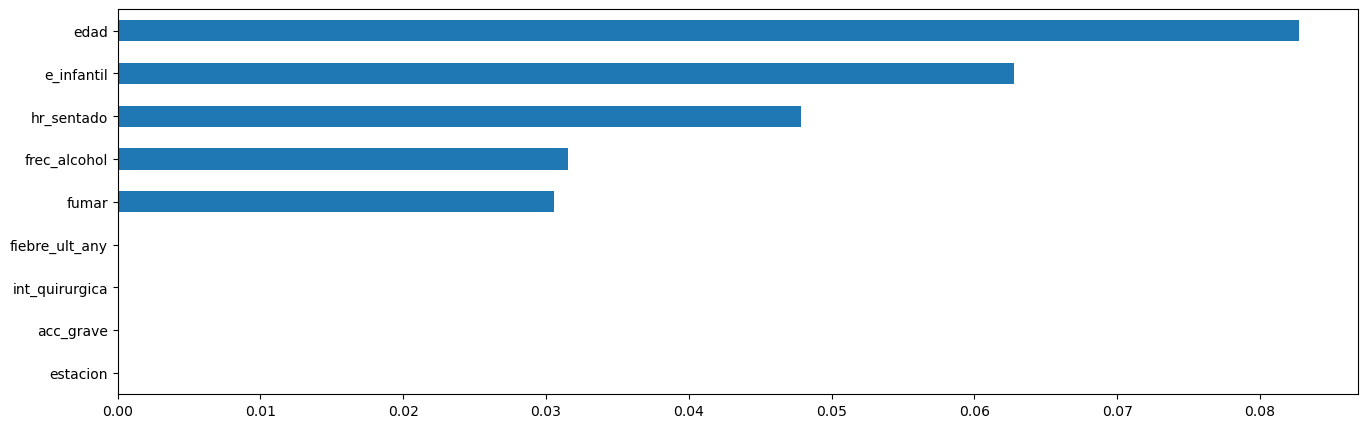

In [7]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [8]:
posicion_variable_limite = 6

##### Extraer los nombres de las que entran

In [9]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [10]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [11]:
rfe = RFECV(estimator = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc'), cv= 5,verbose= 0)

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Entrenar

In [12]:
rfe.fit(x,y)

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecat

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='auc',
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=None, ...))

##### Extraer los nombres de las que entran

In [13]:
entran_rfe = x.columns[rfe.support_]
entran_rfe

Index(['frec_alcohol'], dtype='object')

#### Crear el dataframe con la selección

In [14]:
x_rfe = x[entran_rfe].copy()

### Permutation Importance

#### Crear una función para mostrar el resultado

In [15]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [16]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Revisar la salida

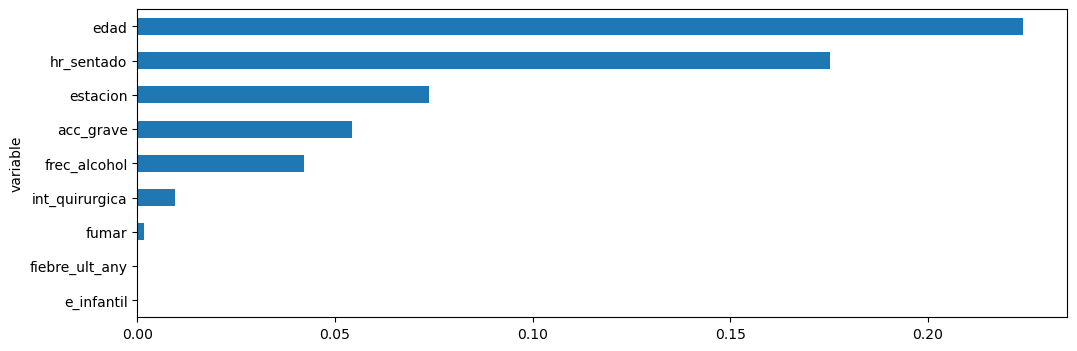

In [17]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,4));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [18]:
posicion_variable_limite = 6

##### Extraer los nombres de las que entran

In [19]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [20]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [21]:
x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
# x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [22]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [23]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [24]:
cor_finales.var1.value_counts()

edad    1
Name: var1, dtype: int64

##### Revisar detalle

In [25]:
cor_finales.head(50)

,var1,var2,corr
2,edad,hr_sentado,0.402714


In [26]:
x_preseleccionado.columns.to_list()

['edad', 'e_infantil', 'hr_sentado', 'frec_alcohol', 'fumar', 'estacion']

**CONCLUSIÓN:** La correlación no es muy fuerte entre edad y hr. sentado, pero hr.sentado no es una variable importante en el mutual information por lo que la eliminaremos del dataset definitivo.

Los próximos notebooks trabajaremos los mejores modelos anteriores con la preselección de variables.

- v2 --> ExtraTreesClassifer con parámetros
- v3 --> XGBClassifier con parámetros

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [27]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = '../../02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = '../../02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [28]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)